In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
training_set = []
training_labels = []

for i in range(125):
  random_under50 = randint(10,50)
  training_set.append(random_under50)
  training_labels.append(1)

  random_over50 = randint(51,90)
  training_set.append(random_over50)
  training_labels.append(0)

for i in range(2500):
  random_under50 = randint(10,50)
  training_set.append(random_under50)
  training_labels.append(1)

  random_over50  = randint(51,90)
  training_set.append(random_over50)
  training_labels.append(1)


In [ ]:
training_labels = np.array(training_labels)
training_set = np.array(training_set)
training_labels, training_set = shuffle(training_labels, training_set)

In [ ]:
print(training_set)

[40 45 88 ... 47 67 36]


In [ ]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [ ]:
scaled_training_set

array([[0.375 ],
       [0.4375],
       [0.975 ],
       ...,
       [0.4625],
       [0.7125],
       [0.325 ]])

CREATE A NEURAL NETWORK


In [ ]:
model = Sequential([
    Dense(units=12, input_shape=(1,), activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=12, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x = scaled_training_set, y=training_labels, validation_split = 0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
473/473 - 5s - loss: 0.5110 - accuracy: 0.9769 - val_loss: 0.3154 - val_accuracy: 0.9695 - 5s/epoch - 10ms/step
Epoch 2/30
473/473 - 1s - loss: 0.2037 - accuracy: 0.9769 - val_loss: 0.1762 - val_accuracy: 0.9695 - 1s/epoch - 3ms/step
Epoch 3/30
473/473 - 1s - loss: 0.1381 - accuracy: 0.9769 - val_loss: 0.1644 - val_accuracy: 0.9695 - 1s/epoch - 3ms/step
Epoch 4/30
473/473 - 1s - loss: 0.1305 - accuracy: 0.9769 - val_loss: 0.1610 - val_accuracy: 0.9695 - 1s/epoch - 2ms/step
Epoch 5/30
473/473 - 1s - loss: 0.1269 - accuracy: 0.9769 - val_loss: 0.1573 - val_accuracy: 0.9695 - 1s/epoch - 2ms/step
Epoch 6/30
473/473 - 1s - loss: 0.1241 - accuracy: 0.9769 - val_loss: 0.1544 - val_accuracy: 0.9695 - 1s/epoch - 2ms/step
Epoch 7/30
473/473 - 1s - loss: 0.1216 - accuracy: 0.9769 - val_loss: 0.1512 - val_accuracy: 0.9695 - 1s/epoch - 2ms/step
Epoch 8/30
473/473 - 1s - loss: 0.1194 - accuracy: 0.9769 - val_loss: 0.1486 - val_accuracy: 0.9695 - 1s/epoch - 2ms/step
Epoch 9/30
473/473 - 1s

Creating data sets that the neural network hasn't seen before


In [ ]:
test_labels = []
test_set = []

for i in range(25):
  random_under50 = randint(10,50)
  test_set.append(random_under50)
  test_labels.append(1)

  random_over50 = randint(51,90)
  test_set.append(random_under50)
  test_labels.append(0)

for i in range(500):
  random_under50 = randint(10,50)
  test_set.append(random_over50)
  test_labels.append(0)

  random_over50 = randint(51,90)
  test_set.append(random_over50)
  test_labels.append(1)


In [ ]:
test_labels = np.array(test_labels)
test_set = np.array(test_set)
test_labels, test_set = shuffle(test_labels, test_set)
scaled_test_set = scaler.fit_transform(test_set.reshape(-1,1))

In [ ]:
scaled_test_set

array([[0.95890411],
       [0.89041096],
       [0.80821918],
       ...,
       [0.90410959],
       [0.53424658],
       [0.47945205]])

In [ ]:
predictions = model.predict(x=scaled_test_set, batch_size=10, verbose=0)

In [ ]:
predictions

array([[0.04701012, 0.95298994],
       [0.04381615, 0.9561839 ],
       [0.04025648, 0.95974356],
       ...,
       [0.04443792, 0.95556206],
       [0.02237364, 0.9776264 ],
       [0.01954411, 0.9804559 ]], dtype=float32)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
rounded_predictions

array([1, 1, 1, ..., 1, 1, 1])

Now we have to visualize our prediction results from the Neural Network on test data

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_conf_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion matrix")
  else:
    print("Confusion Matrix w/o Normalization")

  print(cm)

  thresh = cm.max() / 2.0

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout() 
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')   


Confusion Matrix w/o Normalization
[[  0 525]
 [  0 525]]


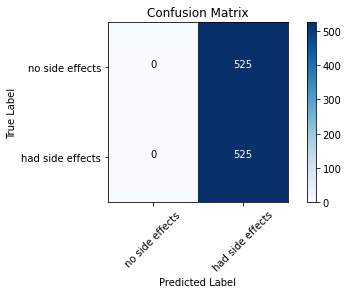

In [ ]:
cm = confusion_matrix(y_true = test_labels, y_pred=rounded_predictions)

cm_plot_labels = ['no side effects','had side effects']
plot_conf_matrix(cm=cm, classes=cm_plot_labels)

In [ ]:
import os.path

if os.path.isfile('vaccine_trial_model.h5') is False:
  model.save('vaccine_trial_model.h5')
  print("Model is saved!")

Model is saved!


In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('vaccine_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[ 0.5552954 ,  0.08321864,  0.5809846 , -0.05490464,  0.05966226,
         -0.03259623, -0.3113912 ,  0.24005003,  0.59172493,  0.25542983,
         -0.03494012, -0.45306766]], dtype=float32),
 array([ 0.2124598 ,  0.19870283, -0.05967989,  0.        ,  0.20431103,
         0.        ,  0.        , -0.02038793,  0.18538424,  0.17536636,
         0.        ,  0.        ], dtype=float32),
 array([[ 0.40682724,  0.47563702,  0.304157  , -0.06149942, -0.35234815,
          0.03841222,  0.27698368, -0.2696213 ,  0.08236355,  0.25795096,
          0.20364714,  0.16582602,  0.1176226 ,  0.3120504 , -0.364536  ,
         -0.2545128 , -0.37149402, -0.30500606, -0.05587103,  0.39530513,
         -0.27436203, -0.00654916, -0.10479441, -0.20723523],
        [ 0.35367602,  0.45903713,  0.44664198, -0.17397816,  0.3777743 ,
          0.11343416, -0.31826535, -0.01294043,  0.3276627 , -0.18671678,
          0.359675  ,  0.30200273,  0.10975882, -0.34639427,  0.17487974,
          0.18591532, 

In [ ]:
import json

In [ ]:
json_string = model.to_json()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 12, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 24, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[ 0.5552954 ,  0.08321864,  0.5809846 , -0.05490464,  0.05966226,
         -0.03259623, -0.3113912 ,  0.24005003,  0.59172493,  0.25542983,
         -0.03494012, -0.45306766]], dtype=float32),
 array([ 0.2124598 ,  0.19870283, -0.05967989,  0.        ,  0.20431103,
         0.        ,  0.        , -0.02038793,  0.18538424,  0.17536636,
         0.        ,  0.        ], dtype=float32),
 array([[ 0.40682724,  0.47563702,  0.304157  , -0.06149942, -0.35234815,
          0.03841222,  0.27698368, -0.2696213 ,  0.08236355,  0.25795096,
          0.20364714,  0.16582602,  0.1176226 ,  0.3120504 , -0.364536  ,
         -0.2545128 , -0.37149402, -0.30500606, -0.05587103,  0.39530513,
         -0.27436203, -0.00654916, -0.10479441, -0.20723523],
        [ 0.35367602,  0.45903713,  0.44664198, -0.17397816,  0.3777743 ,
          0.11343416, -0.31826535, -0.01294043,  0.3276627 , -0.18671678,
          0.359675  ,  0.30200273,  0.10975882, -0.34639427,  0.17487974,
          0.18591532, 

In [ ]:
import os.path

In [ ]:
if os.path.isfile('model_weights.h5') is False:
  model.save_weights('model_weights.h5')
  print("Model saved!")

Model saved!


In [ ]:
model2 = Sequential([
    Dense(units=12, input_shape=(1,), activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=12, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('model_weights.h5')

In [ ]:
model2.get_weights()

[array([[ 0.5552954 ,  0.08321864,  0.5809846 , -0.05490464,  0.05966226,
         -0.03259623, -0.3113912 ,  0.24005003,  0.59172493,  0.25542983,
         -0.03494012, -0.45306766]], dtype=float32),
 array([ 0.2124598 ,  0.19870283, -0.05967989,  0.        ,  0.20431103,
         0.        ,  0.        , -0.02038793,  0.18538424,  0.17536636,
         0.        ,  0.        ], dtype=float32),
 array([[ 0.40682724,  0.47563702,  0.304157  , -0.06149942, -0.35234815,
          0.03841222,  0.27698368, -0.2696213 ,  0.08236355,  0.25795096,
          0.20364714,  0.16582602,  0.1176226 ,  0.3120504 , -0.364536  ,
         -0.2545128 , -0.37149402, -0.30500606, -0.05587103,  0.39530513,
         -0.27436203, -0.00654916, -0.10479441, -0.20723523],
        [ 0.35367602,  0.45903713,  0.44664198, -0.17397816,  0.3777743 ,
          0.11343416, -0.31826535, -0.01294043,  0.3276627 , -0.18671678,
          0.359675  ,  0.30200273,  0.10975882, -0.34639427,  0.17487974,
          0.18591532, 